1. IMPORTING LIBRARIES

2. READING DATA

3. DISPLAYING TOP 5 RECORDS

4. META INFORMATION OF DATAFRAME

4.1- SHAPE OF DATAFRAME

4.2- DATA TYPE OF EACH FEATURE

5. DATA CLEANING

5.1- FINDING NaN VALUES

5.2- IMPUTING MISSING VALUES

5.3- FIXING DATATYPE IN PRICE FEATURE

5.4- FIXING DATATYPE IN CAPACITY FEATURE

5.5- FIXING DATATYPE IN MILAGE FEATURE

5.6- SHORTENING TITLE

5.9- DROPPING UNNECESSARY FEATURES

6. STATISTICAL INFORMATION OF DATA

7. DECLEARING FUNCTION THAT MAKES LINK TO CLICKABLE

8. VISUALIZATION

8.1- ANALYZE TOP 20 VEHICLE WITH HIGHEST PRICE

8.2- ANALYZE TOP 20 VEHICLE WITH LOWEST PRICE

8.3- ANALYZING CONDITION OF VEHICLE_DATA

8.4- ANALYZE DATA BY FUEL TYPE

8.5- ANALYZE VEHICLE'S MANUFACTURED YEAR AND VEHICLE'S SELLING YEAR

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

In [2]:
data=pd.read_csv("vehicle_data.csv")

# Exploratory Data Analysis

In [3]:
data.head()

,Unnamed: 0,Brand,Model,Year,Transmission,Fuel,Capacity,Mileage,Price
0,0,NISSAN,March,2000,Automatic,Petrol,1000,45000,2700000
1,1,NISSAN,March,2000,Automatic,Petrol,1000,46000,2725000
2,2,SUZUKI,BALENO,2000,Manual,Petrol,1300,50000,2275000
3,3,Mitsubishi,Montero,2000,Automatic,Petrol,1500,56000,10800000
4,4,TOYOTA,Starlet,2000,Automatic,Petrol,660,57000,2775000


In [4]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

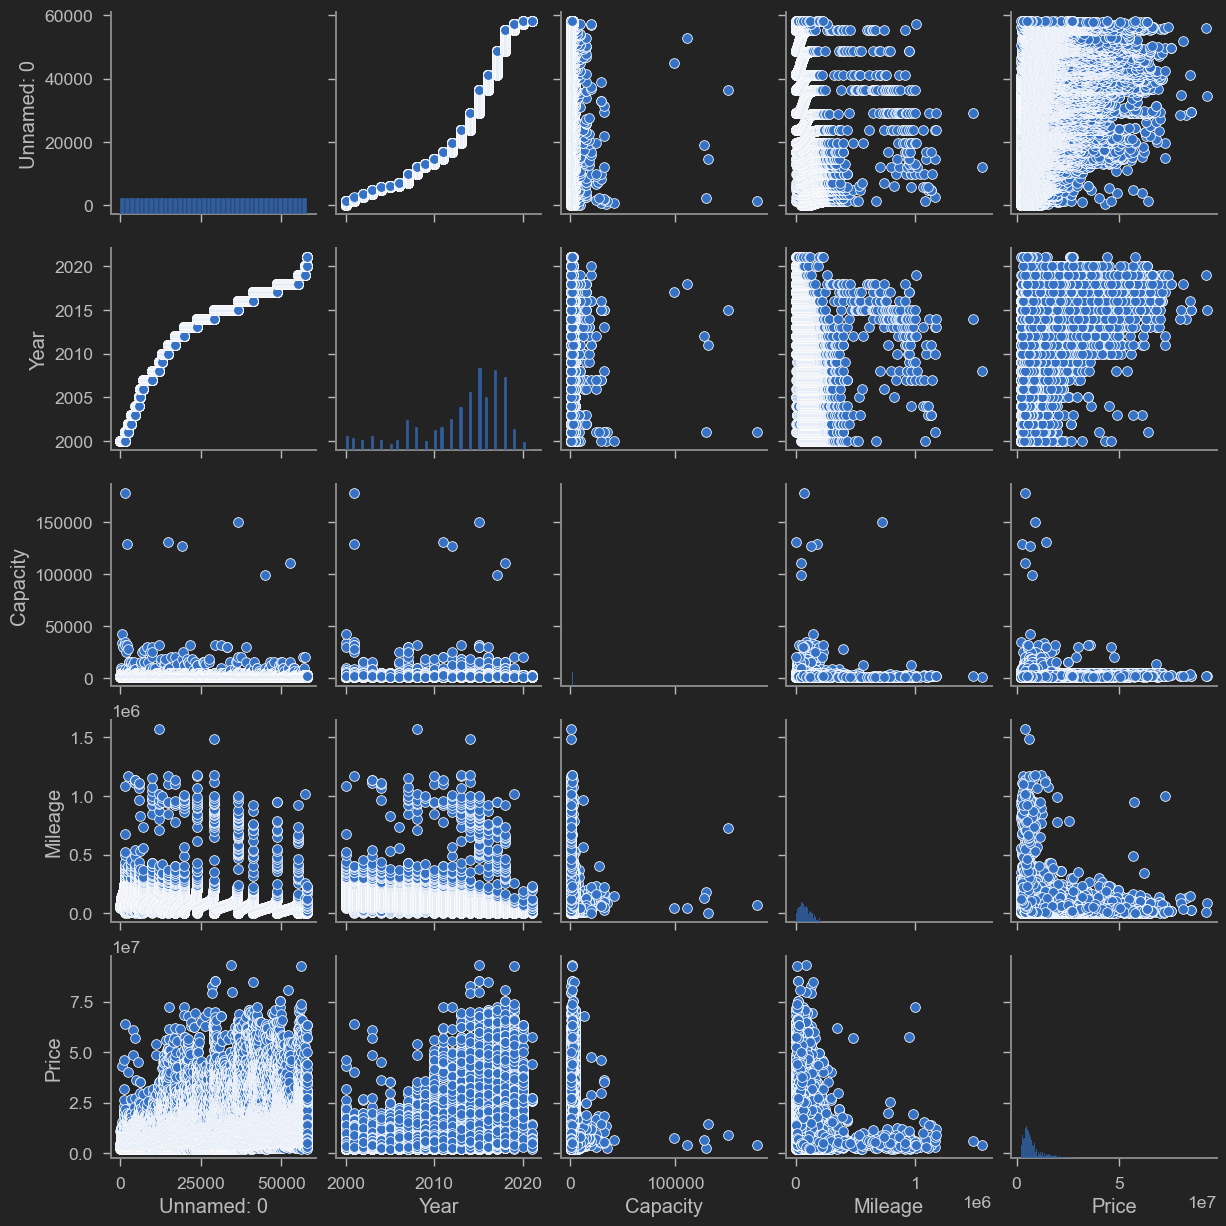

In [5]:
sns.pairplot(data)

<Axes: ylabel='Brand'>

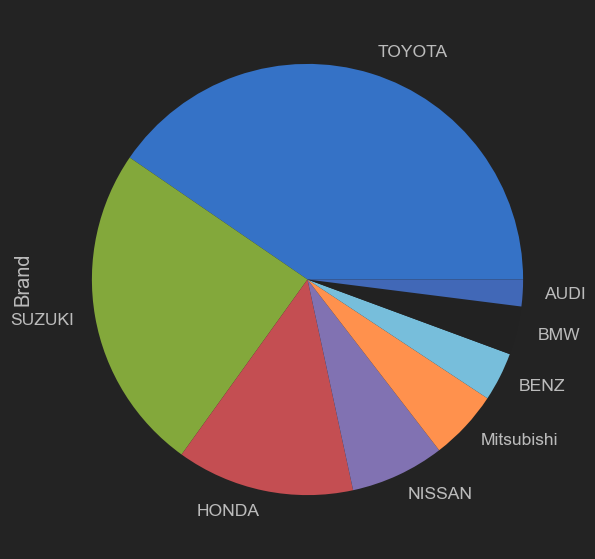

In [6]:
data["Brand"].value_counts().plot(kind="pie")

<Axes: >

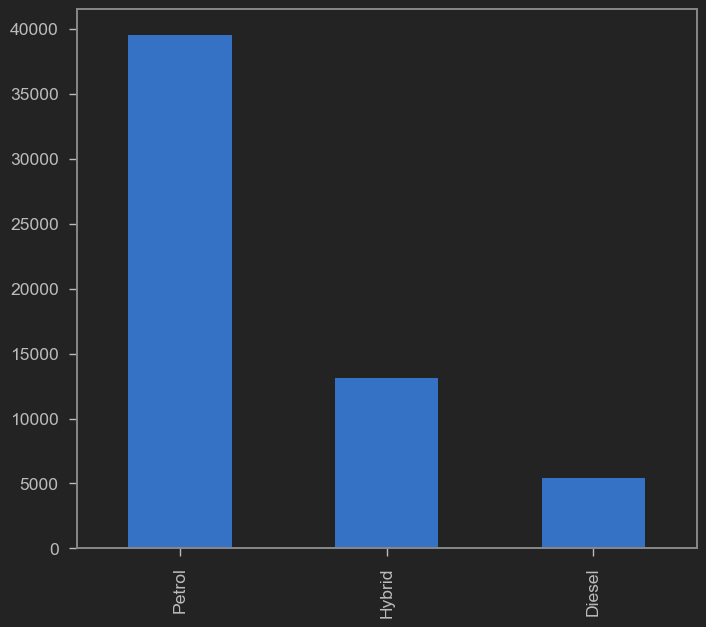

In [7]:
data["Fuel"].value_counts().plot(kind="bar")

# Cleaning

In [8]:
backup=data.copy()

In [9]:
data_copy = data.copy()
data['Capacity'] = data_copy['Capacity'].astype(int)

In [10]:
data=data[data['Capacity']>649].reset_index(drop=True)

In [11]:
data['Capacity'] = data['Capacity'].astype('int32')

In [12]:
data

,Unnamed: 0,Brand,Model,Year,Transmission,Fuel,Capacity,Mileage,Price
0,0,NISSAN,March,2000,Automatic,Petrol,1000,45000,2700000
1,1,NISSAN,March,2000,Automatic,Petrol,1000,46000,2725000
2,2,SUZUKI,BALENO,2000,Manual,Petrol,1300,50000,2275000
3,3,Mitsubishi,Montero,2000,Automatic,Petrol,1500,56000,10800000
4,4,TOYOTA,Starlet,2000,Automatic,Petrol,660,57000,2775000
...,...,...,...,...,...,...,...,...,...
58064,58064,SUZUKI,EVERY,2021,Manual,Petrol,650,120000,2225000
58065,58065,TOYOTA,Verossa,2021,Automatic,Petrol,2000,200000,5500000
58066,58066,NISSAN,Sunny,2021,Automatic,Petrol,1490,225000,3200000
58067,58067,NISSAN,Sunny,2021,Automatic,Petrol,1490,225000,3200000


In [13]:
data['Mileage'] = data['Mileage'].str.replace(',', '')

AttributeError: Can only use .str accessor with string values!

In [ ]:
data['Capacity'] = data['Capacity'].astype('int32')

In [ ]:
data['Mileage'] = data['Mileage'].astype('int')

In [ ]:
data['Fuel'] = data['Fuel'].replace(['Hybrid', 'Electric'], 'Hybrid')

In [ ]:
data=data[data['Mileage']>200].reset_index(drop=True)

In [ ]:
data['Fuel'] = data['Fuel'].replace(['Hybrid', 'Electric'], 'Hybrid')

In [ ]:
## Create a boolean mask to identify rows with 'Other' or 'Gas' in the 'Fuel' column
mask = data['Fuel'].isin(['Other fuel type', 'Gas'])
# Drop the rows based on the mask
data = data[~mask]


<Axes: ylabel='Fuel'>

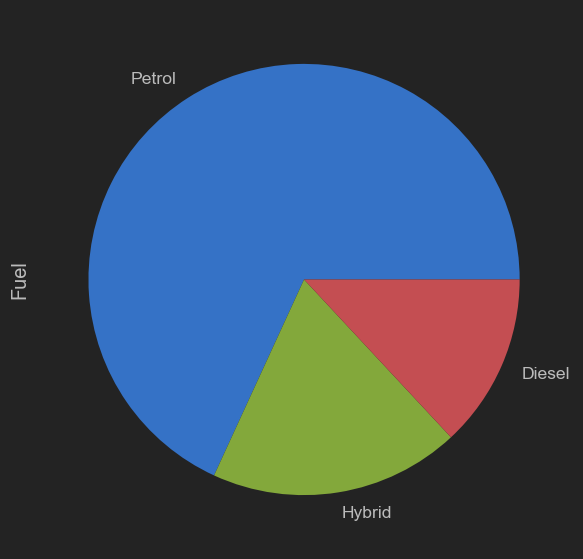

In [ ]:
data["Fuel"].value_counts().plot(kind="pie")

In [ ]:
# Create a boolean mask to identify rows with 'Other' or 'Gas' in the 'Fuel' column
trans = data['Transmission'].isin(['Other transmission'])

# Drop the rows based on the mask
data = data[~trans].reset_index(drop=True)

<Axes: ylabel='Transmission'>

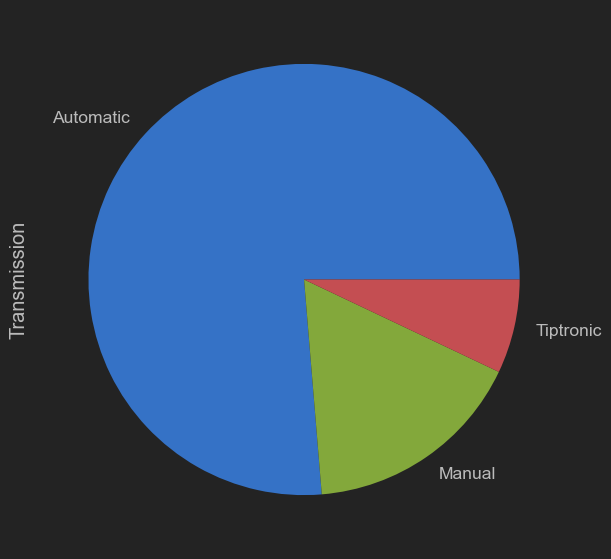

In [ ]:
data["Transmission"].value_counts().plot(kind="pie")

In [ ]:
# Merge 'Land-Rover' and 'LAND ROVER' into 'LAND ROVER' in the 'Brand' column
data['Brand'] = data['Brand'].replace(['Land-Rover', 'LAND ROVER','Range-Rover'], 'RANGE ROVER')

<Axes: ylabel='Brand'>

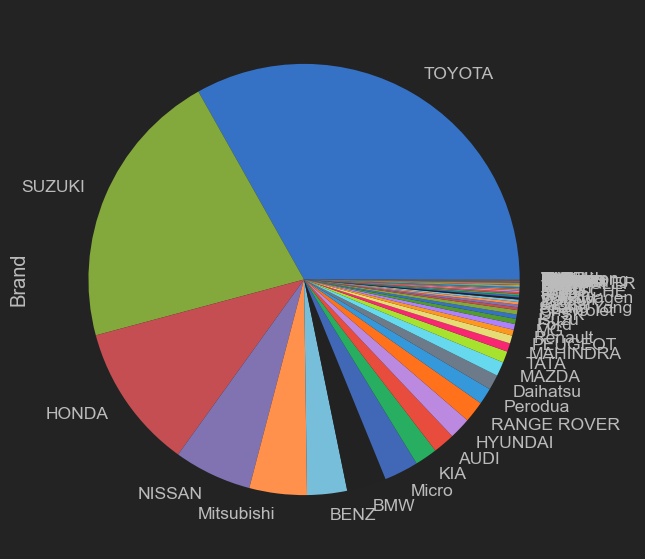

In [ ]:
data["Brand"].value_counts().plot(kind="pie")

In [ ]:
brands_to_keep = ['TOYOTA', 'SUZUKI', 'HONDA', 'NISSAN', 'Mitsubishi','BENZ','BMW','AUDI','RANGE ROVER']
filtered_data = data[data['Brand'].isin(brands_to_keep)]

In [ ]:
data = data[data['Brand'].isin(brands_to_keep)].reset_index(drop=True)

In [ ]:
data['Brand'] = data['Brand'].str.split().str[0]

In [ ]:
data['Model'] = data['Model'].str.split().str[0]


In [ ]:
data['Price']=data['Price'].astype('float')

In [ ]:
data['Brand'] = data['Brand'].str.upper()
data['Model'] = data['Model'].str.upper()
data['Transmission'] = data['Transmission'].str.upper()
data['Fuel'] = data['Fuel'].str.upper()

# Checking statistical description of data

In [ ]:
data.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Year,59922.000000,2012.924869,5.034017,2000.000000,2010.000000,2014.000000,2017.000000,2021.000000
Capacity,59922.000000,1529.969677,1763.550288,650.000000,1000.000000,1500.000000,1790.000000,177790.000000
Mileage,59922.000000,84892.261223,66280.517491,220.000000,43400.000000,75000.000000,114500.000000,1570000.000000
Price,59922.000000,10126063.737459,11126312.465491,550000.000000,4600000.000000,6600000.000000,11250000.000000,712722798.000000


In [ ]:
top_highest_price = data.sort_values("Price", ascending=False).reset_index().head(20)
ex.scatter(top_highest_price, x="Model", y="Price",
           size="Price",
           hover_data=['Transmission', 'Fuel', 'Price'],
           color="Transmission")


In [ ]:
max_price = data['Price'].max()
max_price_values = data[data['Price'] == max_price]['Price']
print(max_price_values)

12616    712722798.0
Name: Price, dtype: float64


In [ ]:
max_price = data['Price'].max()
car_models_max_price = data[data['Price'] == max_price]['Model']
print(car_models_max_price)

12616    AXIO
Name: Model, dtype: object


In [ ]:
data.drop(data[(data['Price'] > 7.127228e+07) & (data['Brand'] == 'TOYOTA')].index, inplace=True)

In [ ]:
toyota_high_price = data[(data['Price'] > 7.127228e+07) & (data['Brand'] == 'TOYOTA')]
print(toyota_high_price)

Empty DataFrame
Columns: [Brand, Model, Year, Transmission, Fuel, Capacity, Mileage, Price]
Index: []


In [ ]:
price_threshold = 2.100000e+08

# Display car models equal to or greater than the price threshold
models_above_threshold = data[data['Price'] >= price_threshold]['Model']
print(models_above_threshold)

# Drop rows with car models equal to or greater than the price threshold
data.drop(data[data['Price'] >= price_threshold].index, inplace=True)

35258    MONTERO
Name: Model, dtype: object


In [ ]:
price_threshold = 1.820000e+08

# Display car models equal to or greater than the price threshold
models_above_threshold = data[data['Price'] >= price_threshold]['Model']
print(models_above_threshold)
# Drop rows with car models equal to or greater than the price threshold
data.drop(data[data['Price'] >= price_threshold].index, inplace=True)

20689    MONTERO
Name: Model, dtype: object


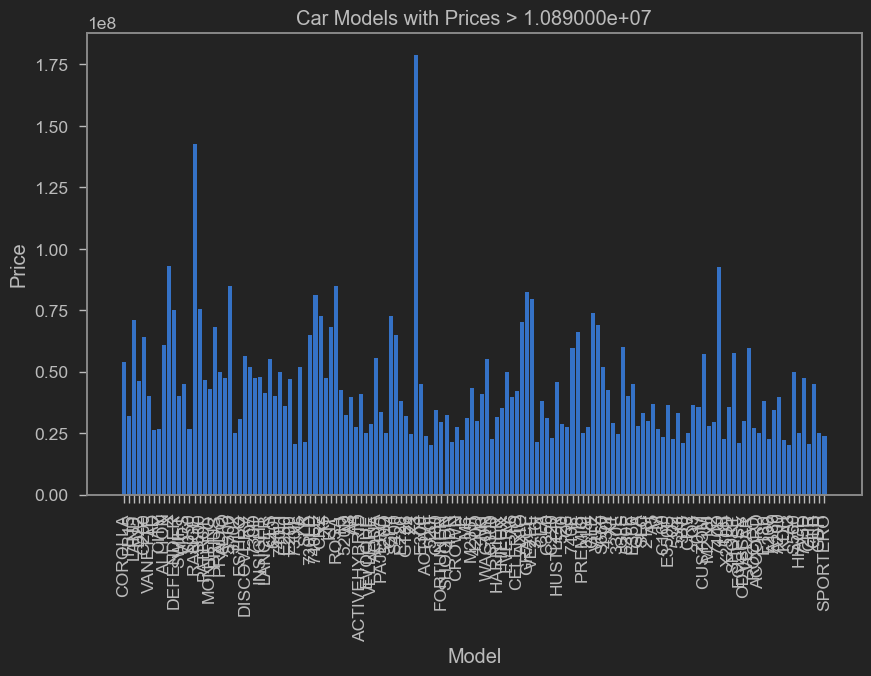

In [ ]:
price_threshold = 1.989000e+07

# Filter data for models with prices greater than the threshold
filtered_data = data[data['Price'] > price_threshold]

# Plot a bar chart of the filtered data
plt.figure(figsize=(10, 6))
plt.bar(filtered_data['Model'], filtered_data['Price'])
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Price')
plt.title('Car Models with Prices > 1.089000e+07')
plt.show()

In [ ]:
data=data[data['Price']<98700000].reset_index(drop=True)

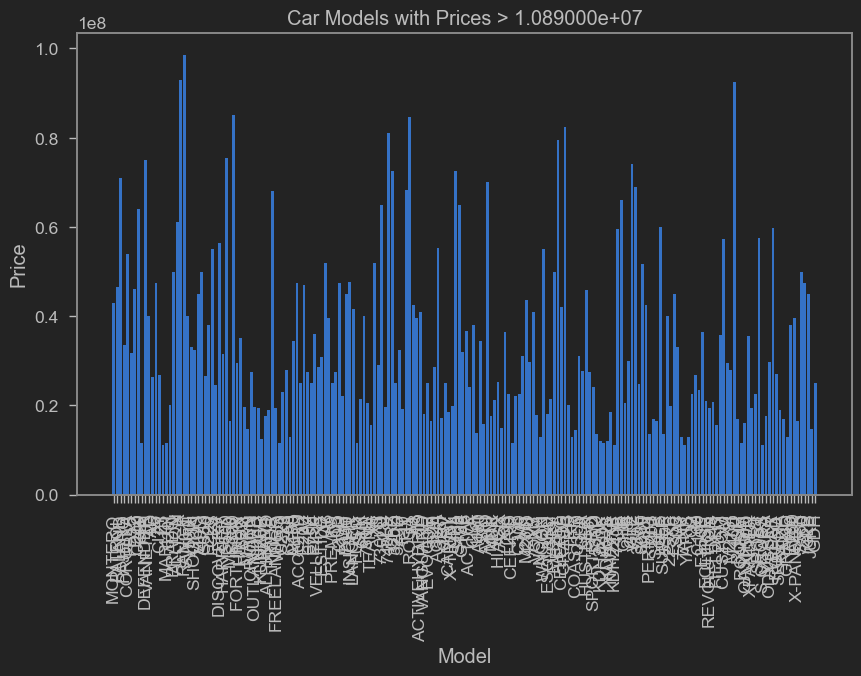

In [ ]:
price_threshold = 1.089000e+07

# Filter data for models with prices greater than the threshold
filtered_data = data[data['Price'] > price_threshold]

# Plot a bar chart of the filtered data
plt.figure(figsize=(10, 6))
plt.bar(filtered_data['Model'], filtered_data['Price'])
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Price')
plt.title('Car Models with Prices > 1.089000e+07')
plt.show()

In [ ]:
data.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Year,59855.000000,2012.921577,5.034488,2000.000000,2010.000000,2014.000000,2017.000000,2021.000000
Capacity,59855.000000,1528.590728,1763.524004,650.000000,1000.000000,1500.000000,1790.000000,177790.000000
Mileage,59855.000000,84875.902281,65920.818865,220.000000,43500.000000,75000.000000,114524.000000,1570000.000000
Price,59855.000000,10007223.598329,10189071.684175,550000.000000,4600000.000000,6595000.000000,11200000.000000,98650000.000000


# ANALYZING WITH HIGHEST PRICE

In [ ]:
top_highest_price = data.sort_values("Price", ascending=False).reset_index().head(100)
ex.scatter(top_highest_price, x="Model", y="Price",
           size="Price",
           hover_data=['Transmission', 'Fuel', 'Price'],
           color="Transmission")


# ANALYZING VEHICLES WITH LOWEST PRICE

In [ ]:
lowest_price_vehicle = data.sort_values("Price", ascending = True).reset_index().head(20)
ex.scatter(lowest_price_vehicle, x = "Model", y = "Price",
           size = "Price",
           hover_data=[ 'Transmission', 'Fuel','Price'],
           color = "Transmission")

In [ ]:
data.drop(data[data['Price'] < 900000]['Model'].index, inplace=True)

In [ ]:
lowest_price_vehicle = data.sort_values("Price", ascending = True).reset_index().head(300)
ex.scatter(lowest_price_vehicle, x = "Model", y = "Price",
           size = "Price",
           hover_data=[ 'Transmission', 'Fuel','Price'],
           color = "Transmission")

In [ ]:
data.drop(data[(data['Model'] == 'Allion') & (data['Price'] < 2400000)].index, inplace=True)

In [ ]:
ex.histogram(data, x='Fuel', barmode='group', color="Transmission",)

In [ ]:
data.drop(data[data['Price'] < 2000000].index, inplace=True)

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
lowest_price_vehicle = data.sort_values("Price", ascending = True).reset_index().head(300)
ex.scatter(lowest_price_vehicle, x = "Model", y = "Price",
           size = "Price",
           hover_data=[ 'Transmission', 'Fuel','Price'],
           color = "Transmission")

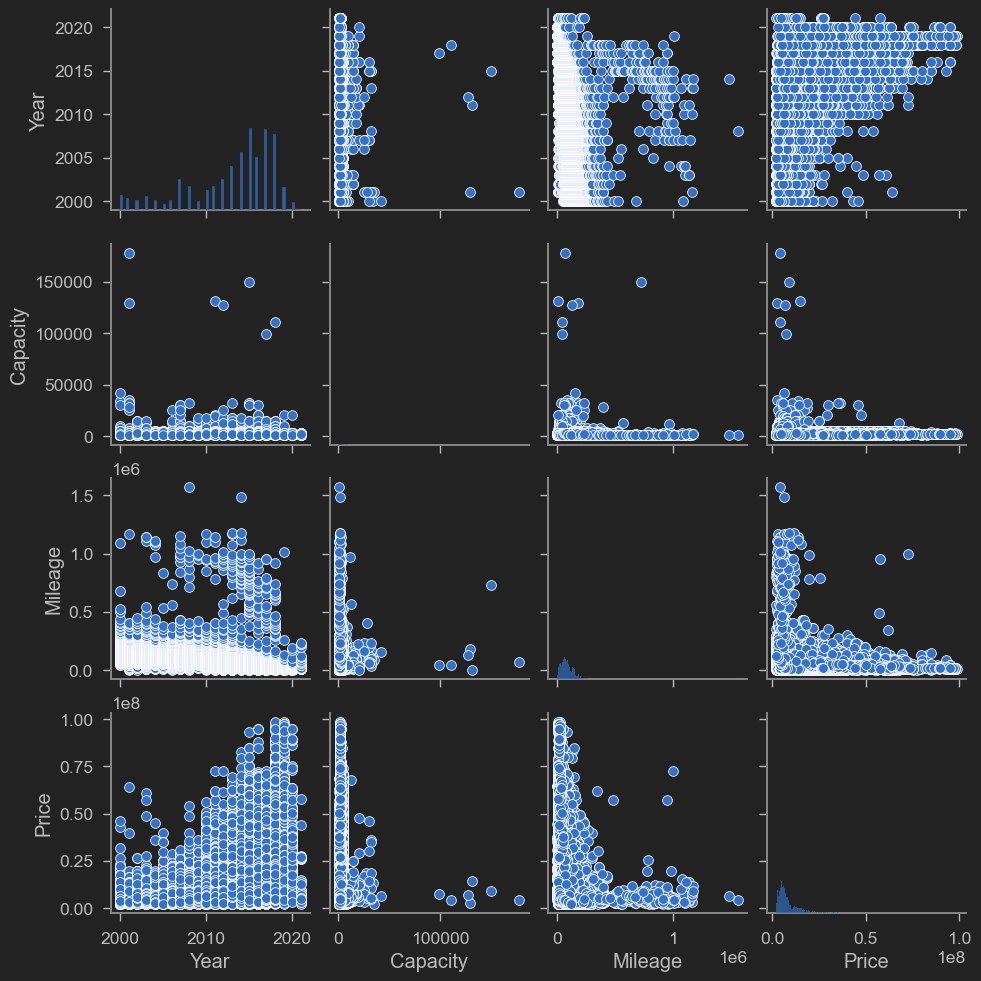

In [ ]:
sns.pairplot(data)

In [ ]:
data.corr()

C:\Users\yusuf\AppData\Local\Temp\ipykernel_14420\2627137660.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Year,Capacity,Mileage,Price
Year,1.000000,-0.128973,-0.589866,0.291607
Capacity,-0.128973,1.000000,0.111544,0.202477
Mileage,-0.589866,0.111544,1.000000,-0.229145
Price,0.291607,0.202477,-0.229145,1.000000


C:\Users\yusuf\AppData\Local\Temp\ipykernel_14420\1614269180.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

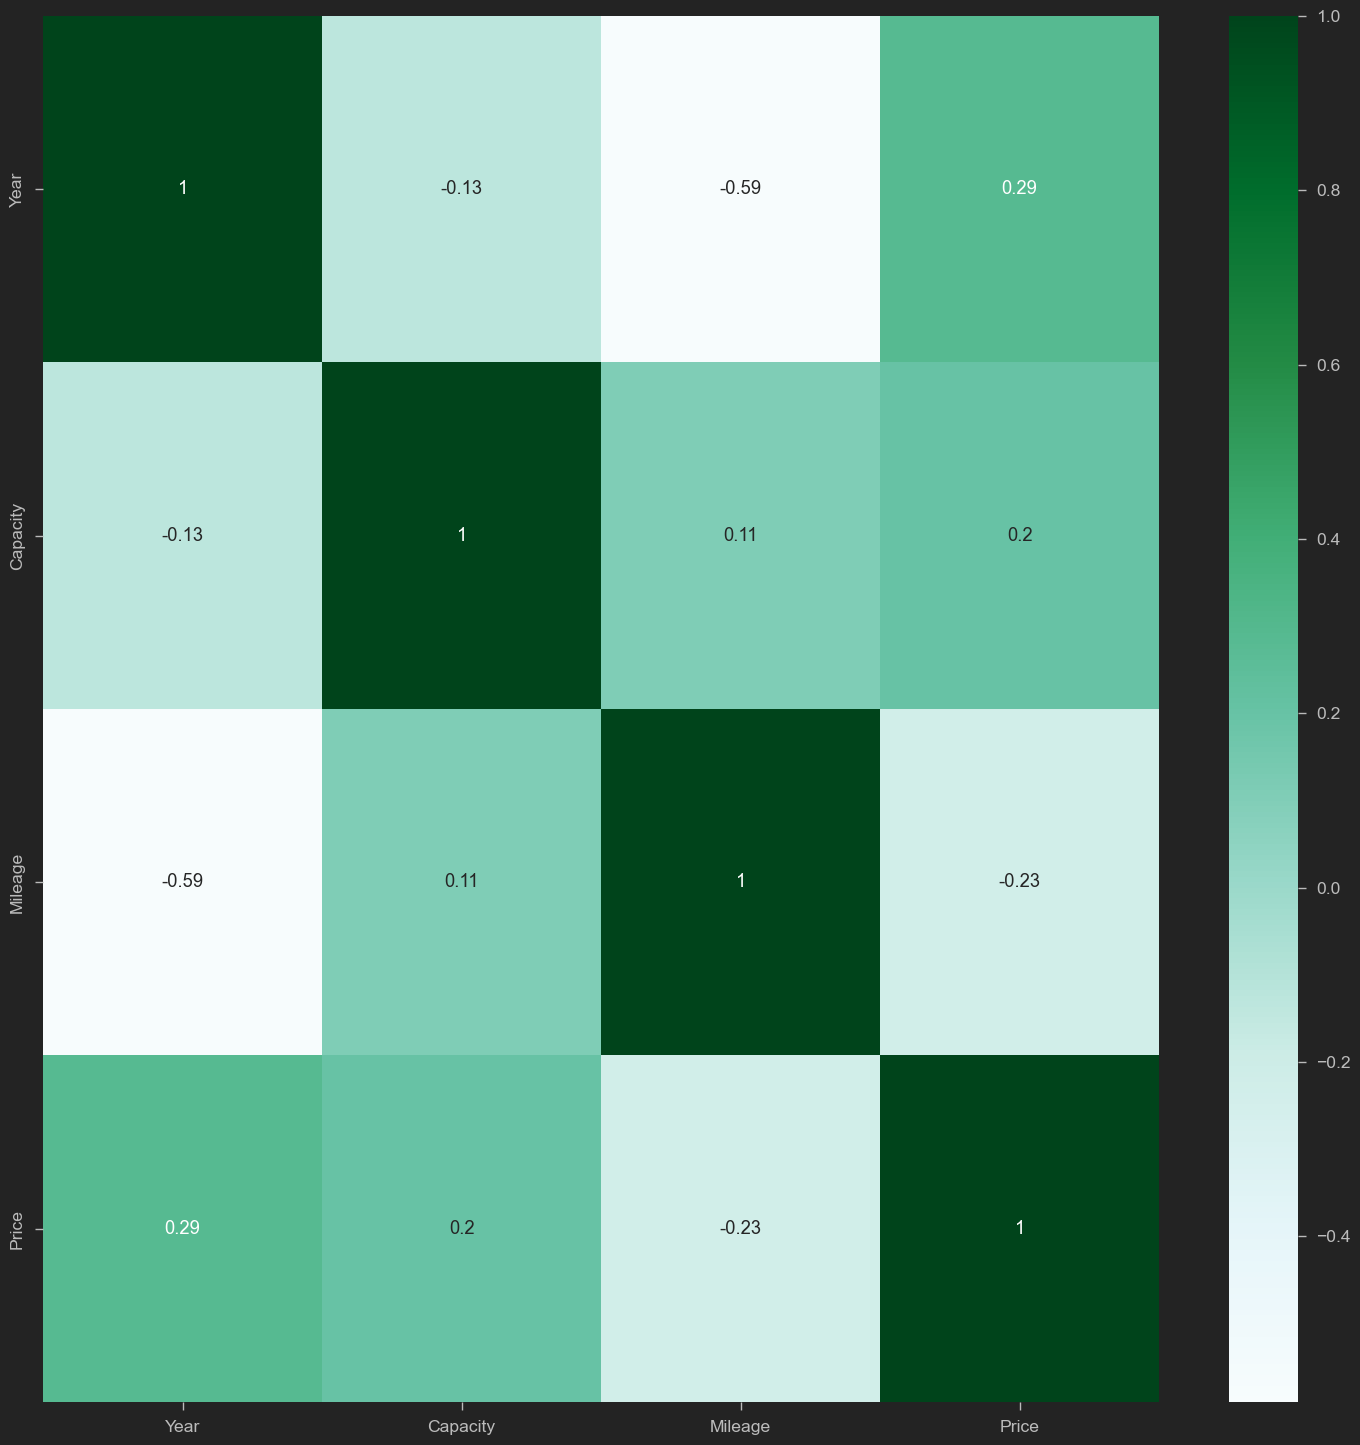

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),cmap="BuGn",annot=True)

In [ ]:
X=data.drop(columns='Price')
Y=data['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


In [ ]:
ohe=OneHotEncoder()
ohe.fit(X[['Brand','Model','Transmission','Fuel']])

OneHotEncoder()

In [ ]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Brand','Model','Transmission','Fuel']),remainder='passthrough')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [ ]:
pipe=make_pipeline(column_trans,rf)

In [ ]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['AUDI', 'BENZ', 'BMW', 'HONDA', 'MITSUBISHI', 'NISSAN', 'RANGE',
       'SUZUKI', 'TOYOTA'], dtype=object),
                                                                            array(['102', '108', '116I', '118I', '201', '2015', '2017', '218I',
       '225XE', '240', '30', '316I', '318', '318I', '320D', '320I',
       '32...
       'WINGROADYV12', 'WIRA', 'X', 'X-PANDER', 'X-TRAIL', 'X1', 'X2',
       'X250D', 'X3', 'X5', 'X6', 'XBEE', 'XPANDER', 'XTRAIL', 'Y', 'Y11',
       'YARIS', 'Z3', 'Z4', 'ZEN'], dtype=object),
                                                                            array(['AUTOMATIC', 'MANUAL', 'TIPTRONIC'], dtype=object),
                                                                            array(['DIESEL', 'HYBRID', 'PETROL'], dtype=object)]),
                                                  ['Brand', 'Model',
                                                   'Transmission', 'Fuel'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:
ohe = OneHotEncoder()
ohe.fit(pd.concat([X_train[['Brand', 'Model', 'Fuel','Transmission']], X_test[['Brand', 'Model', 'Fuel','Transmission']]]))  # Fit on the combined dataset

X_train_encoded = ohe.transform(X_train[['Brand', 'Model', 'Fuel','Transmission']])  # Encode training set
X_test_encoded = ohe.transform(X_test[['Brand', 'Model', 'Fuel','Transmission']])  # Encode test set


In [ ]:
scores = []

# Calculate scores and append them to the list
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    rf = RandomForestRegressor()
    pipe = make_pipeline(column_trans, rf)
    pipe.fit(X_train, Y_train)
    Y_pred = pipe.predict(X_test)
    score = r2_score(Y_test, Y_pred)
    scores.append(score)

# Find the index of the maximum score
max_score_index = np.argmax(scores)

# Use the random_state with the maximum score to split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=max_score_index)

In [ ]:
np.argmax(scores)

23

In [ ]:
scores[np.argmax(scores)]

0.9247910063350082

# Random Forest Regression

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=np.argmax(scores))
rf = RandomForestRegressor()
pipe=make_pipeline(column_trans,rf)
pipe.fit(X_train,Y_train)
Y_pred=pipe.predict(X_test)
r2_score(Y_test,Y_pred)
   

0.9238370805138579

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe,open('rfrfinal.pkl','wb'))

In [ ]:
#Close